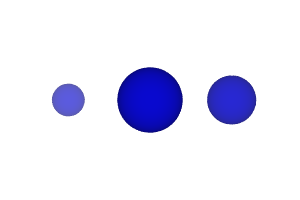

In [1]:
from fdray import *
from fdray.data import from_field


def get_object(x):
    return Sphere(0, x, Color("blue", alpha=2 * x))


Scene(
    Camera(-90, 0, view_scale=1.5, look_at=(1, 0, 0)),
    LightSource(0, "white"),
    from_field([0.2, 0.4, 0.3], get_object, ndim=0),
).render(300, 200)

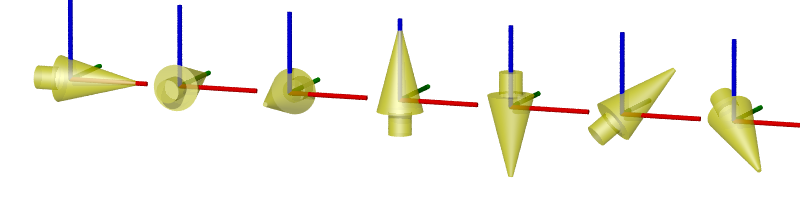

In [123]:
from math import degrees

axes = [
    Cylinder((0, 0, 0), (0.7, 0, 0), 0.02, Color("red")),
    Cylinder((0, 0, 0), (0, 0.7, 0), 0.02, Color("green")),
    Cylinder((0, 0, 0), (0, 0, 0.7), 0.02, Color("blue")),
]


def get_object(x):
    phi, theta = Vector(x).to_spherical()

    h = Cone((-0.1, 0, 0), 0.2, (0.6, 0, 0), 0.02)
    t = Cylinder((-0.3, 0, 0), (0, 0, 0), 0.1)

    c = (
        (h | t)
        .pigment(Color("yellow", alpha=0.5))
        .finish(specular=0.3)
        .rotate(0, -degrees(theta), degrees(phi))
    )

    return Union(c, *axes)


f = [[1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1], [1, 1, 1], [1, -1, -1]]

Scene(
    Camera(-70, 10, view_scale=1.7, look_at=(3, 0, 0), distance=150),
    LightSource((0.4, 30, 40), "white"),
    from_field(f, get_object, ndim=1),
).render(800, 200)